In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

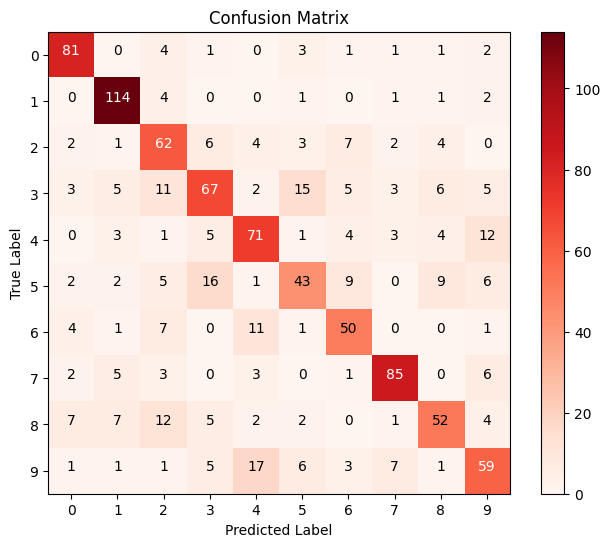

In [7]:
file_paths = [
    #"inference_results_train_silico.ste.6.png_0_5000.csv",
    #"inference_results_train_silico.ste.6.png_5000_5000.csv"
    #"inference_results_test_silico.ptq.6.png_0_1000.csv"
    #"inference_results_train_silico.ste.6.png_0_5000.csv"
    #"inference_results_test_silico.ptq.8.png_0_1000.csv"
    "2025_10_30/002/b/inference_test.csv"
]

# Combine data from multiple CSV files
data_frames = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)

data = pd.concat(data_frames, ignore_index=True)

confusion_matrix = np.zeros((10, 10), dtype=int)
for index, row in data.iterrows():
    true_label = int(row['Label'])
    predicted_label = int(row['Prediction'])
    confusion_matrix[true_label][predicted_label] += 1

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Reds)
# Overlay counts on the heatmap
thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [4]:
# Give the count of labels per class
label_counts = data['Label'].value_counts().sort_index()
for label, count in label_counts.items():
    print(f"Label {label}: {count} samples")

Label 0: 94 samples
Label 1: 123 samples
Label 2: 91 samples
Label 3: 122 samples
Label 4: 104 samples
Label 5: 93 samples
Label 6: 75 samples
Label 7: 105 samples
Label 8: 92 samples
Label 9: 101 samples


In [8]:
# From confusion matrix, calculate accuracy
correct_predictions = np.trace(confusion_matrix)
total_predictions = np.sum(confusion_matrix)
accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

# It saves correct in pd
accuracy = data['Correct'].sum() / len(data)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 68.40%
Accuracy: 68.40%


In [9]:
# Print the average Reward for each label, print from largest to smallest
average_rewards = []
for label in range(10):
    label_data = data[data['Label'] == label]
    average_reward = label_data['Reward'].mean()
    average_rewards.append((label, average_reward))

# Sort by average reward
average_rewards.sort(key=lambda x: x[1], reverse=True)

for label, avg_reward in average_rewards:
    print(f'Average Reward for label {label}: {avg_reward:.2f}')

Average Reward for label 0: -0.98
Average Reward for label 7: -1.00
Average Reward for label 1: -1.10
Average Reward for label 2: -1.18
Average Reward for label 8: -1.26
Average Reward for label 6: -1.28
Average Reward for label 4: -1.29
Average Reward for label 3: -1.66
Average Reward for label 9: -1.80
Average Reward for label 5: -1.95


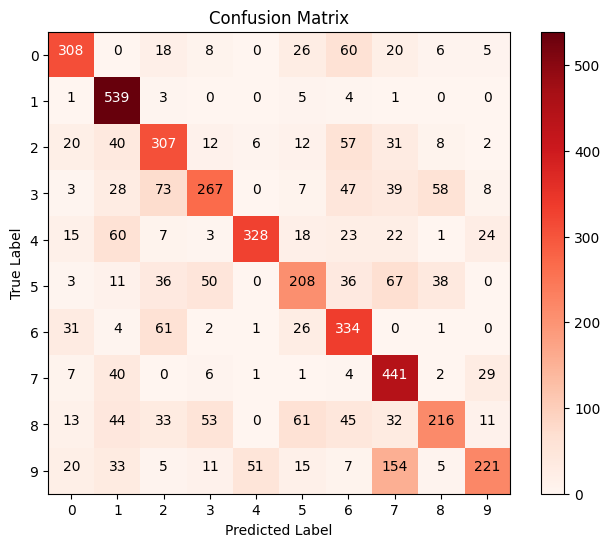

Accuracy: 63.38%


In [7]:
file_paths = [
    #"inference_results_train_silico.ste.6.png_0_5000.csv",
    #"inference_results_train_silico.ste.6.png_5000_5000.csv"
    #"inference_results_valid_silico.ste.6.png_0_5000.csv",
    "inference_results_test_silico.ptq.6.png_0_5000.csv",
    #"inference_results_train_silico.ptq.6.png_0_5000.csv",
    #"inference_results_train_silico.ptq.6.png_5000_5000.csv"
    #"inference_results_valid_silico.ptq.6.png_0_5000.csv",
    #"inference_results_test_silico.ptq.6.png_0_5000.csv",
]

# Combine data from multiple CSV files
data_frames = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)
data = pd.concat(data_frames, ignore_index=True)

# Show confusion matrix
confusion_matrix = np.zeros((10, 10), dtype=int)
for index, row in data.iterrows():
    true_label = int(row['Label'])
    predicted_label = int(row['Prediction'])
    confusion_matrix[true_label][predicted_label] += 1

plt.figure(figsize=(8, 6))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Reds)
# Overlay counts on the heatmap
thresh = confusion_matrix.max() / 2.
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, format(confusion_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix[i, j] > thresh else "black")
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print accuracy
correct_predictions = np.trace(confusion_matrix)
total_predictions = np.sum(confusion_matrix)
accuracy = correct_predictions / total_predictions
print(f'Accuracy: {accuracy * 100:.2f}%')

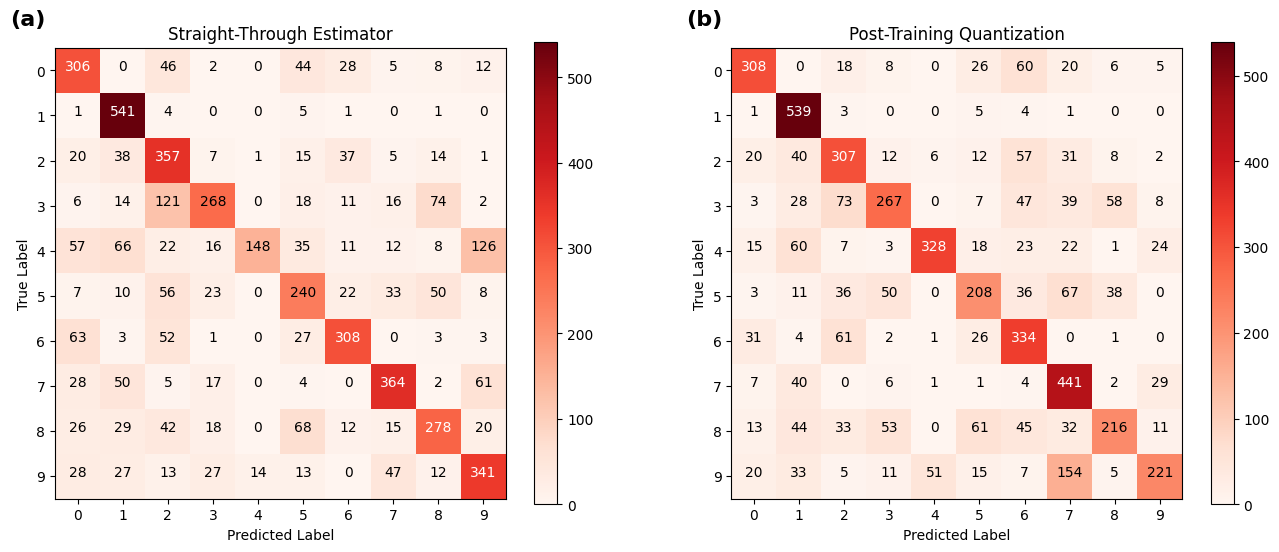

In [10]:
fig_a_data = "inference_results_test_silico.ste.6.png_0_5000.csv"
fib_b_data = "inference_results_test_silico.ptq.6.png_0_5000.csv"

# Load data from both files, plot side by side confusion matricies
data_a = pd.read_csv(fig_a_data)
data_b = pd.read_csv(fib_b_data)

# Calculate confusion matrix for data_a
confusion_matrix_a = np.zeros((10, 10), dtype=int)
for index, row in data_a.iterrows():
    true_label = int(row['Label'])
    predicted_label = int(row['Prediction'])
    confusion_matrix_a[true_label][predicted_label] += 1

# Calculate confusion matrix for data_b
confusion_matrix_b = np.zeros((10, 10), dtype=int)
for index, row in data_b.iterrows():
    true_label = int(row['Label'])
    predicted_label = int(row['Prediction'])
    confusion_matrix_b[true_label][predicted_label] += 1

# Plot side by side confusion matricies
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
im1 = ax1.imshow(confusion_matrix_a, interpolation='nearest', cmap=plt.cm.Reds)
im2 = ax2.imshow(confusion_matrix_b, interpolation='nearest', cmap=plt.cm.Reds)
# Overlay counts on the heatmaps
thresh_a = confusion_matrix_a.max() / 2.
thresh_b = confusion_matrix_b.max() / 2.
for i in range(confusion_matrix_a.shape[0]):
    for j in range(confusion_matrix_a.shape[1]):
        ax1.text(j, i, format(confusion_matrix_a[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix_a[i, j] > thresh_a else "black")
        ax2.text(j, i, format(confusion_matrix_b[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion_matrix_b[i, j] > thresh_b else "black")
ax1.set_title('Straight-Through Estimator')
ax2.set_title('Post-Training Quantization')
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
tick_marks = np.arange(10)
ax1.set_xticks(tick_marks)
ax1.set_yticks(tick_marks)
ax1.set_xticklabels(range(10))
ax1.set_yticklabels(range(10))
ax2.set_xticks(tick_marks)
ax2.set_yticks(tick_marks)
ax2.set_xticklabels(range(10))
ax2.set_yticklabels(range(10))
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

# Add (a) and (b) labels to the subplots
ax1.text(-0.1, 1.05, '(a)', transform=ax1.transAxes, fontsize=16, fontweight='bold')
ax2.text(-0.1, 1.05, '(b)', transform=ax2.transAxes, fontsize=16, fontweight='bold')

plt.show()
